## Reading and plotting GW data
- for reference have a look at https://github.com/jkanner/gw-intro

### Install extra packages

In [52]:
import requests, os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
except:
    ! pip install -q "gwpy"
    ! pip install -q "matplotlib"
    from gwpy.timeseries import TimeSeries    


### Select a chunck of data on a specific ITF in your data set

In [53]:

# -- Set a GPS time:
t0 = 1256665188     
#-- Choose detector as H1, L1, or V1
detector = 'L1'

In [54]:
#data path file
fn ='C:\\Users\Elena\\Lectures\\GWML-masterclass\\data\\L-L1_GWOSC_O3b_16KHZ_R1-1256665088-4096.hdf5'
 

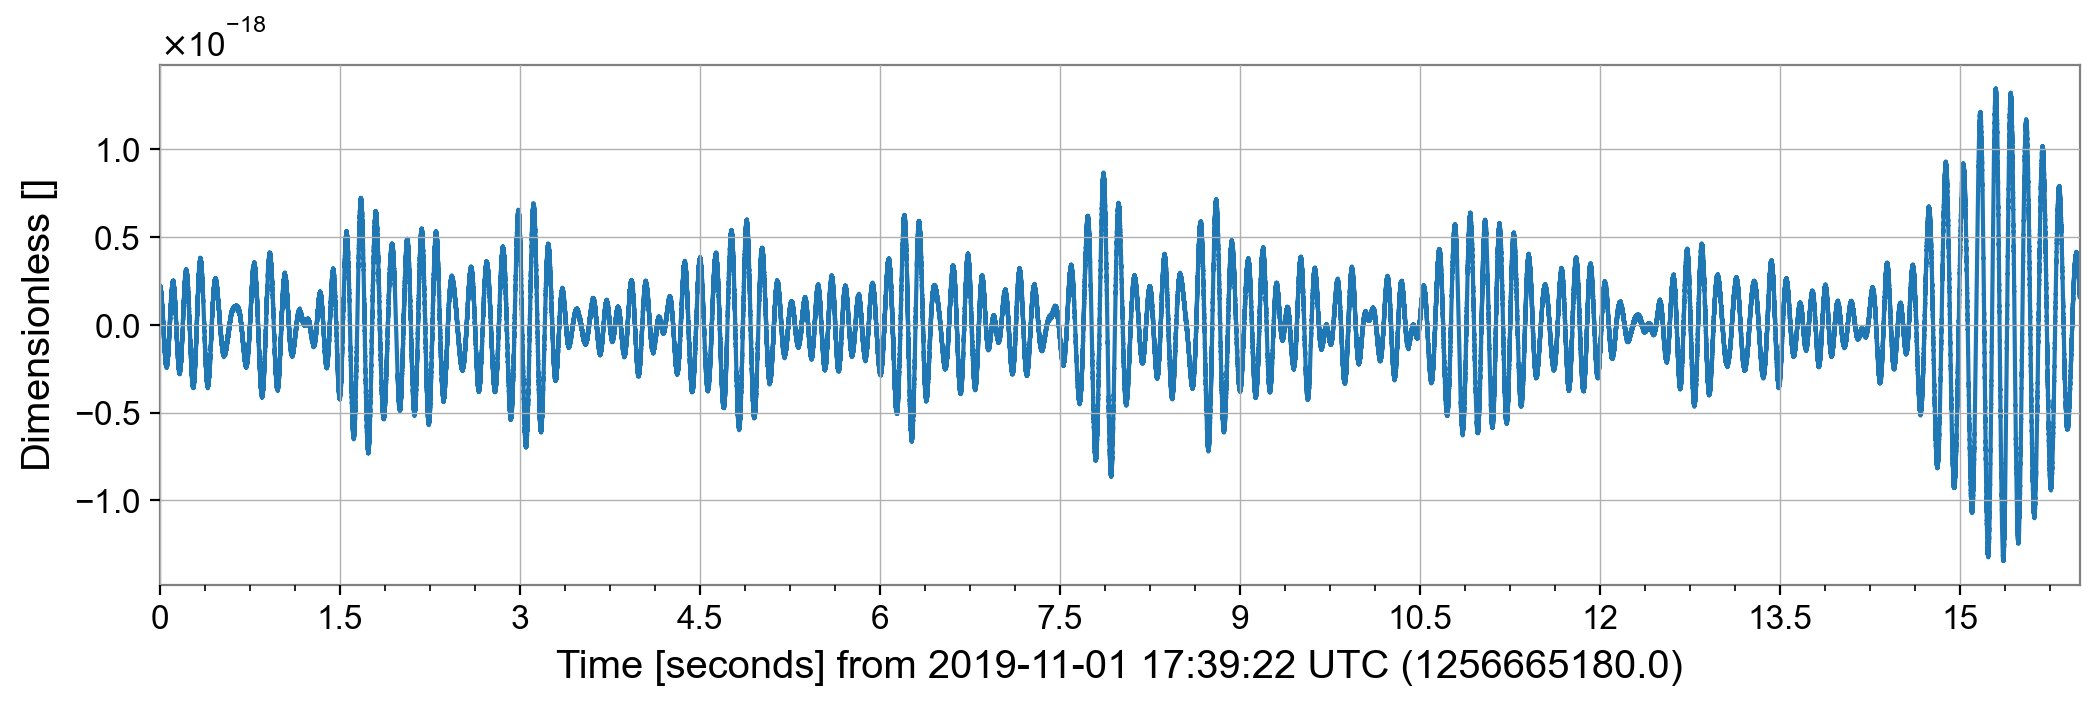

In [55]:
#plotting strain data

# -- Read strain data
strain = TimeSeries.read(fn,format='hdf5.gwosc')
center = int(t0)
strain = strain.crop(center-8, center+8)
fig1 = strain.plot()



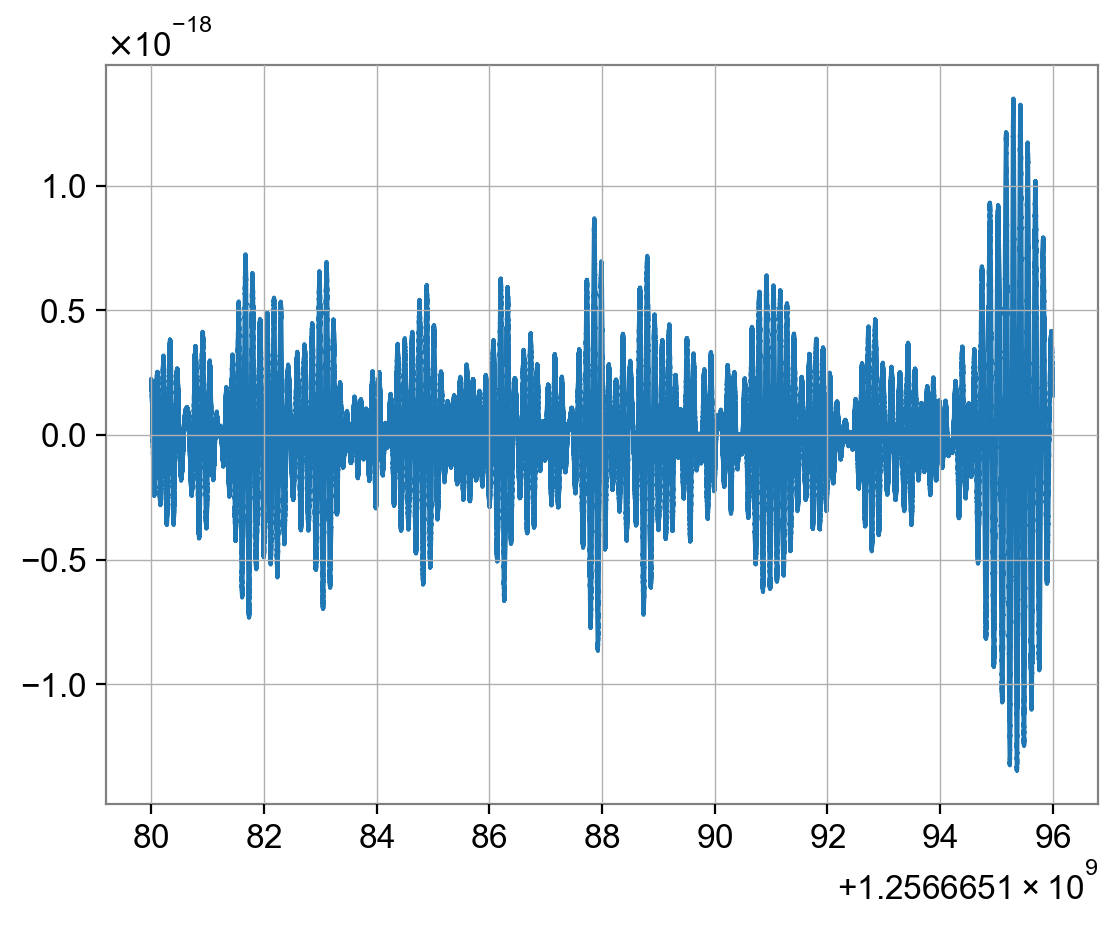

In [56]:
plt.plot(strain)

(1e-24, 1e-19)

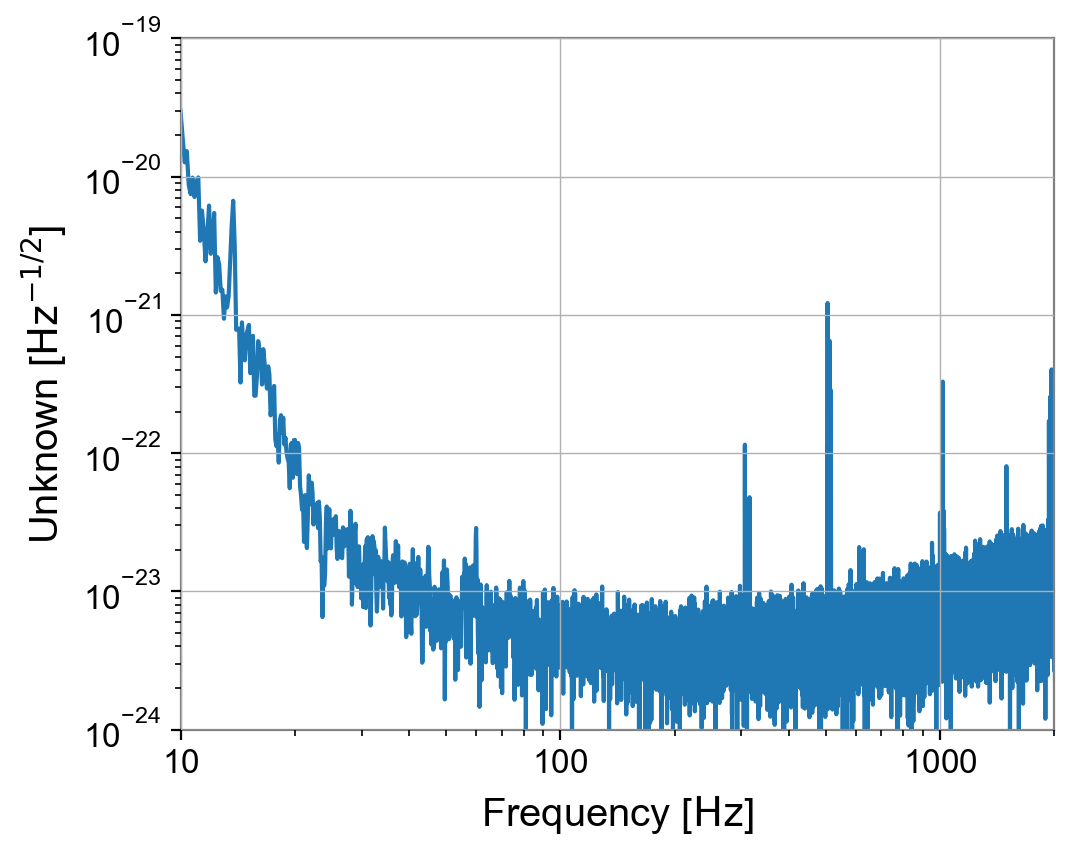

In [57]:
#plot ASD

# -- Plot ASD
fig2 = strain.asd(fftlength=8).plot()
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)



(1256665187.8, 1256665188.1)

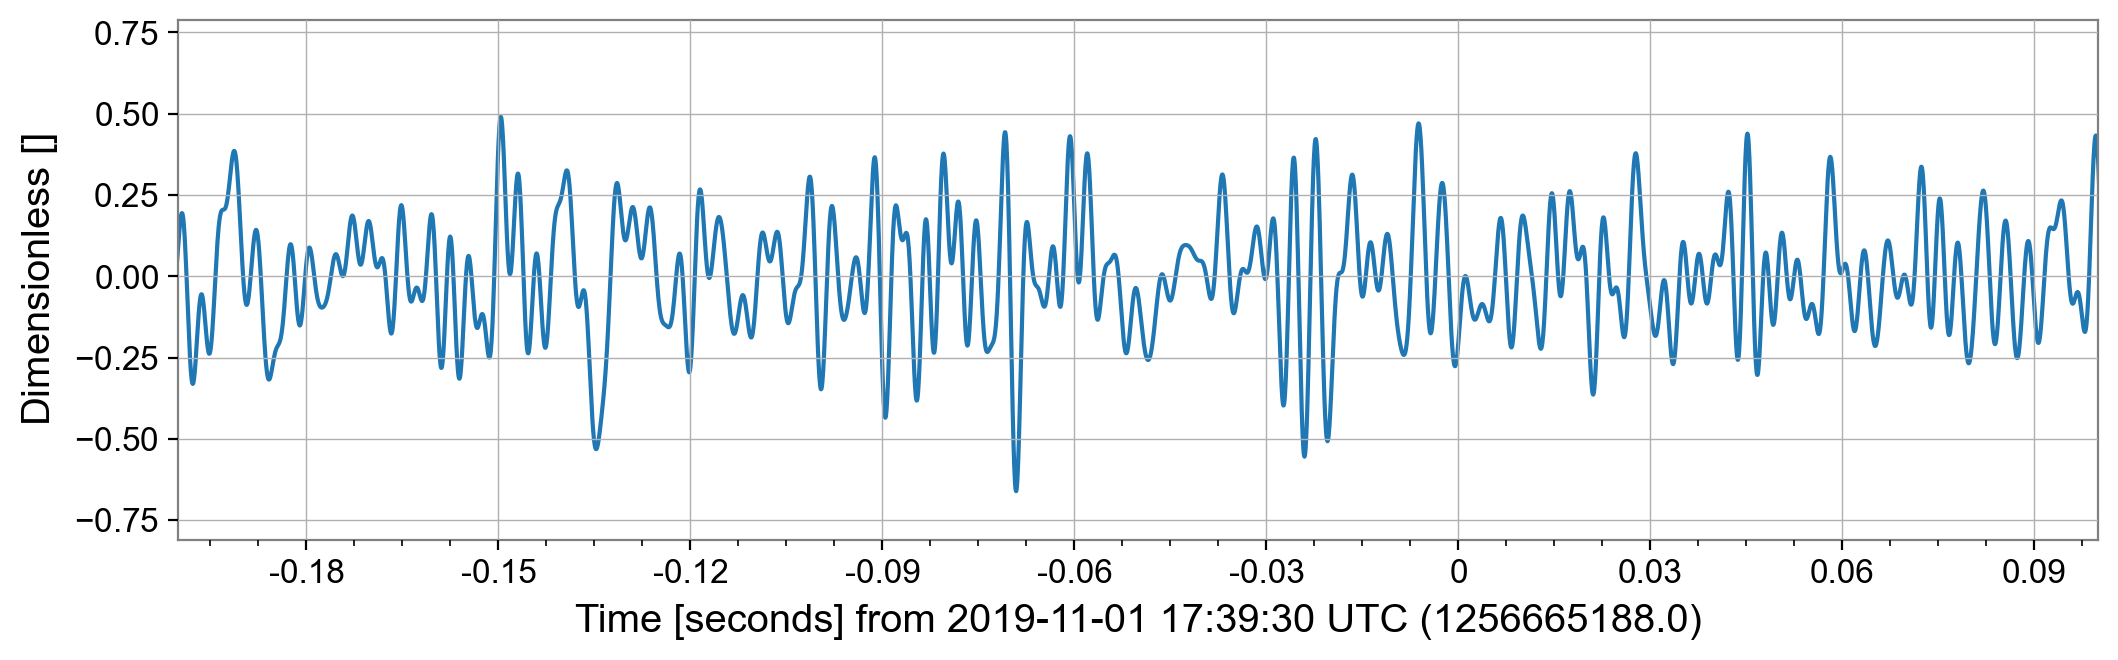

In [58]:

# -- Whiten and bandpass data
white_data = strain.whiten()
bp_data = white_data.bandpass(30, 400)
fig3 = bp_data.plot()
plt.xlim(t0-0.2, t0+0.1)



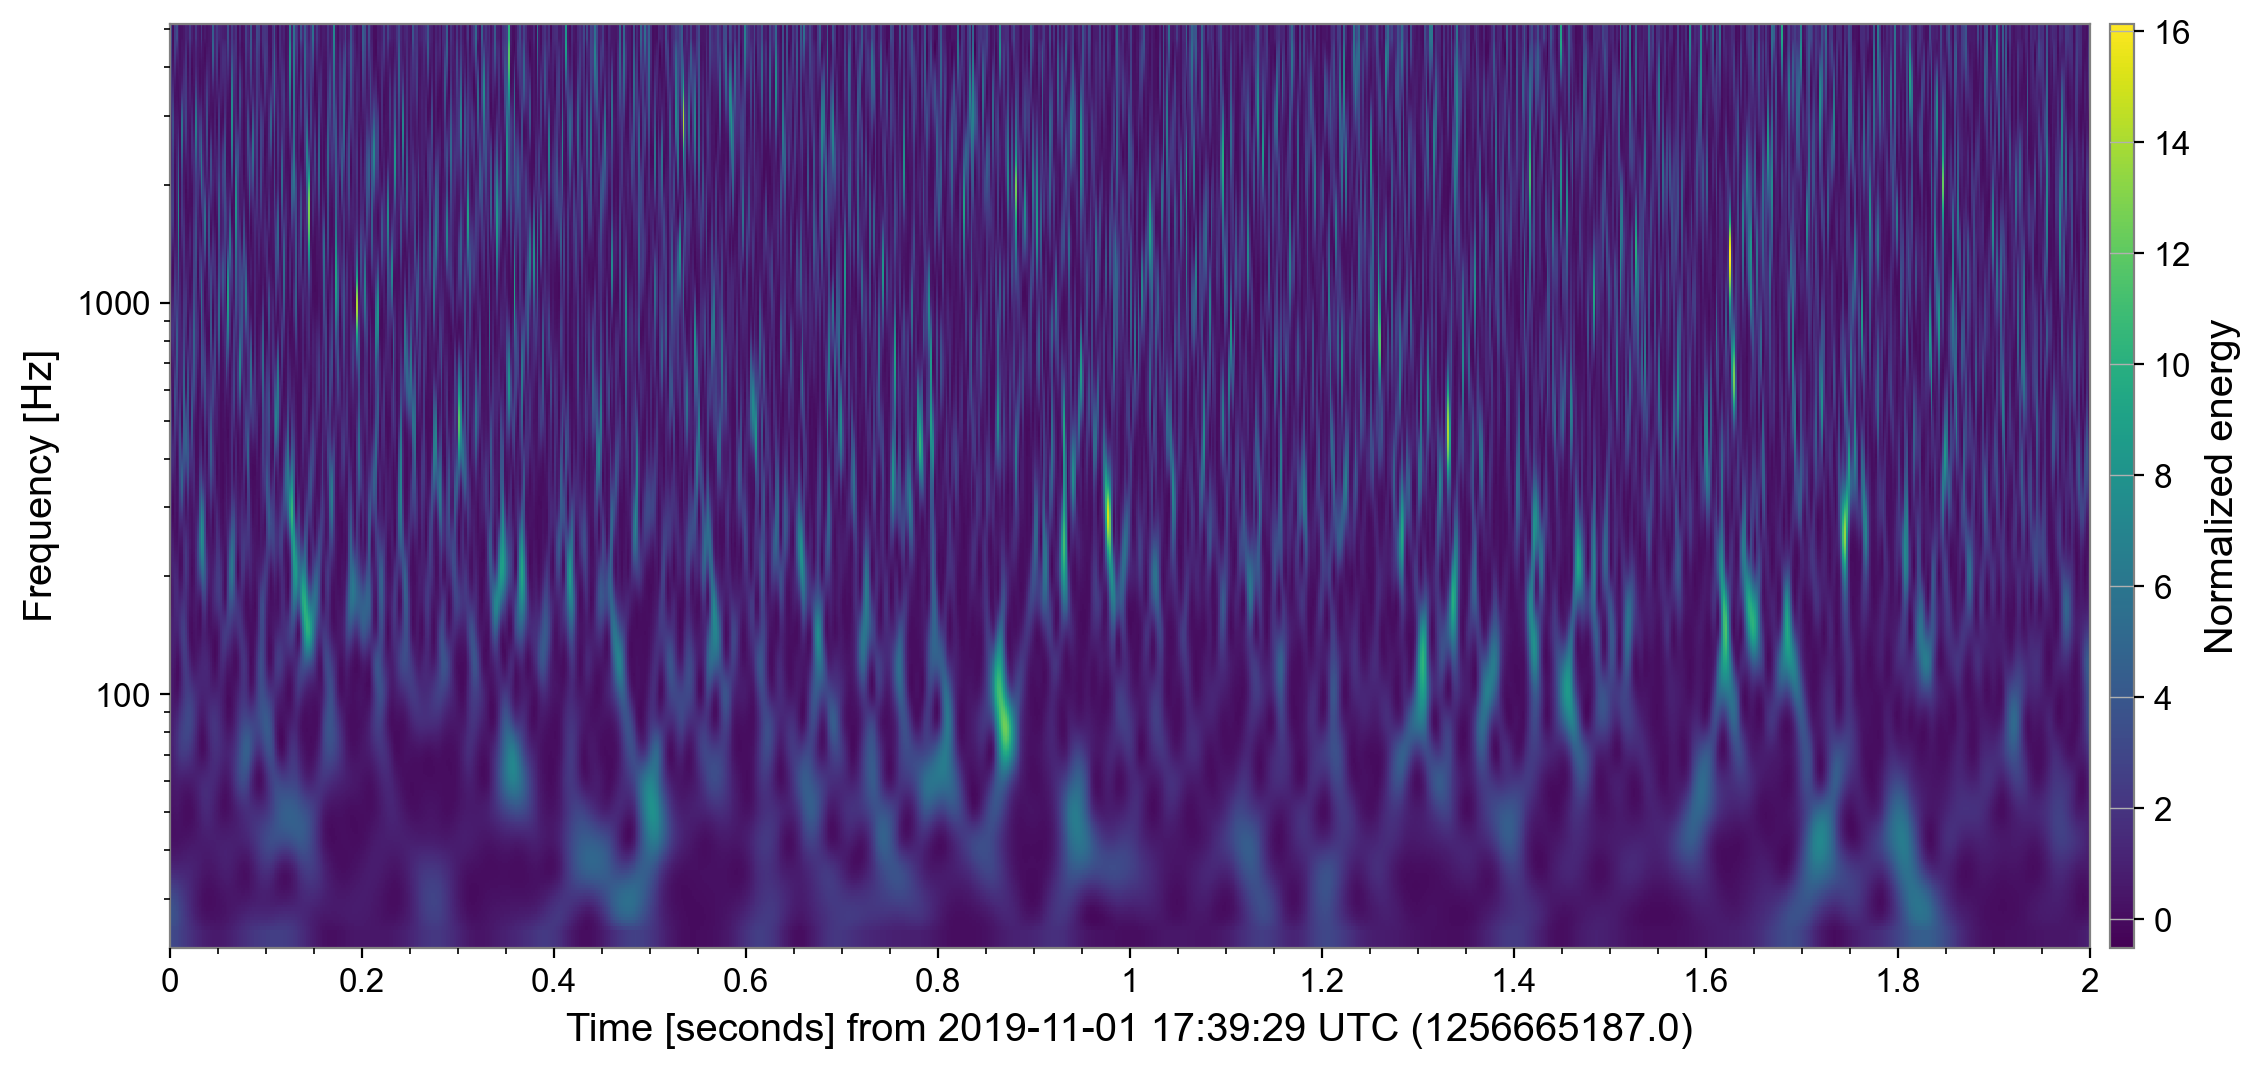

In [59]:


dt = 1  #-- Set width of q-transform plot, in seconds
hq = strain.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')

